In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# EUCLIDIAN DISTANCE

In [5]:
import numpy as np
from collections import Counter

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self,k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self,x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('target',axis=1).values
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42,shuffle=True)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
accuracies = []

for i in range(1,25):
    knn = KNN(k=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    accuracies.append(np.sqrt(mean_squared_error(y_test,predictions)))

Text(0.5, 1.0, 'Euclidian Accuracy')

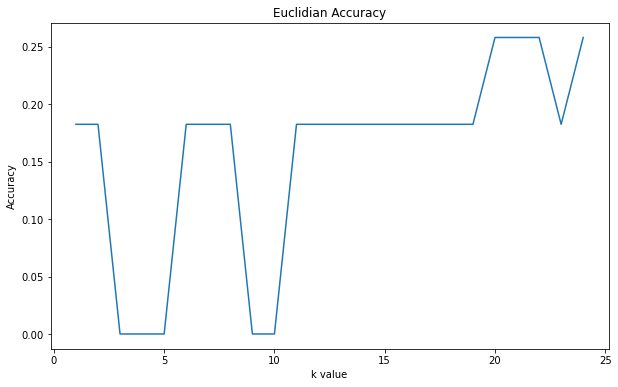

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,25),y=accuracies)
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Euclidian Accuracy')

Text(0.5, 1.0, 'Euclidian Accuracy Zoomed In')

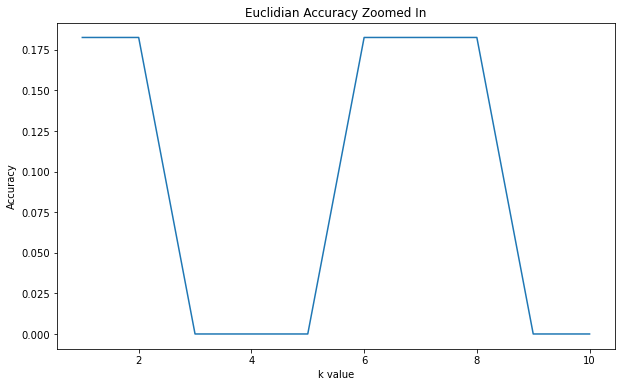

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,11),y=accuracies[0:10])
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Euclidian Accuracy Zoomed In')

# Dari Graph tersebut dapat dilihat bahwa k optimal adalah 2-6 dan 9-10

In [10]:
from sklearn.metrics import classification_report
knn = KNN(k=9)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# MANHATTAN DISTANCE

In [11]:
def manhattan_distance(x1,x2):
    return np.sum(abs(x1 - x2))
    

class KNN_manhattan:
    def __init__(self,k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self,x):
        distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [12]:
from sklearn.metrics import accuracy_score
accuracies = []

for i in range(1,25):
    knn = KNN_manhattan(k=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test,predictions))

Text(0.5, 1.0, 'Manhattan Accuracy')

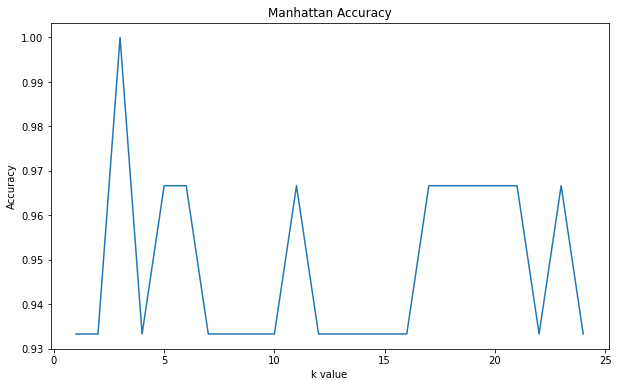

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,25),y=accuracies)
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Manhattan Accuracy')

Text(0.5, 1.0, 'Manhattan Accuracy Zoomed In')

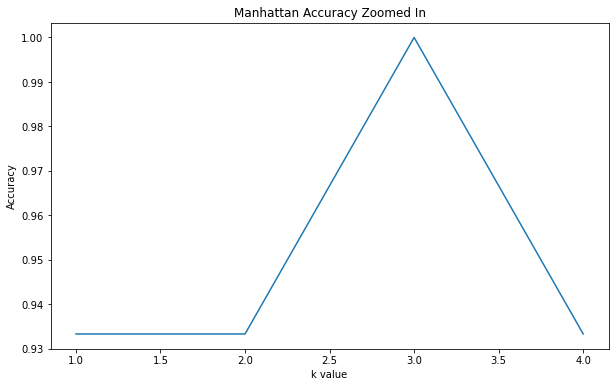

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,5),y=accuracies[0:4])
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Manhattan Accuracy Zoomed In')

# Dari Graph tersebut dapat dilihat bahwa optimal k adalah 3

In [15]:
from sklearn.metrics import classification_report
knn = KNN_manhattan(k=3)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# HAMMING DISTANCE

In [16]:
def hamming_distance(x1,x2):
    if abs(np.sum(np.subtract(x1,x2))) != 0:
        return 1
    else:
        return 0 
    

class KNN_hamming:
    def __init__(self,k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self,x):
        distances = [hamming_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [17]:
from sklearn.metrics import accuracy_score
accuracies = []

for i in range(1,25):
    knn = KNN_hamming(k=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test,predictions))

Text(0.5, 1.0, 'Hamming Accuracy')

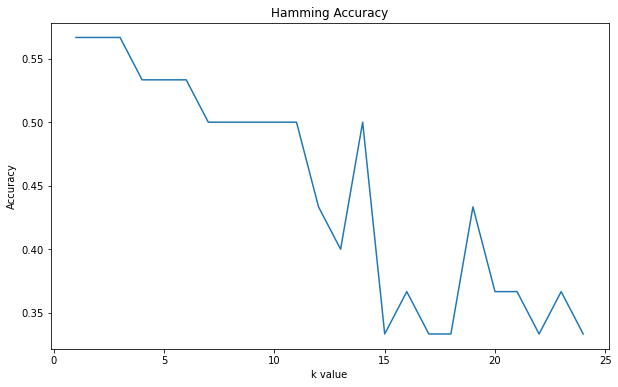

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,25),y=accuracies)
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Hamming Accuracy')

Text(0.5, 1.0, 'Hamming Accuracy Zoomed In')

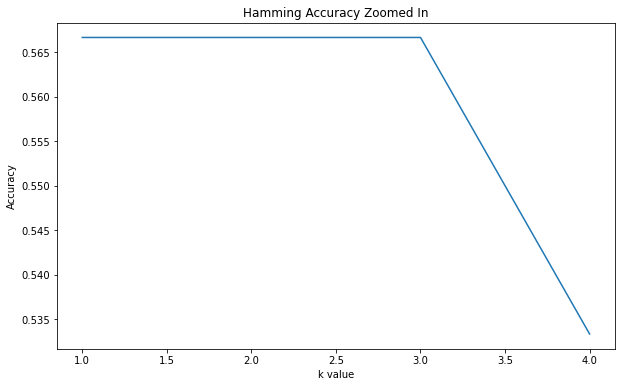

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,5),y=accuracies[0:4])
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Hamming Accuracy Zoomed In')

# Dari Graph diatas, dapat dilihat bahwa k optimal adalah 1-3

In [20]:
from sklearn.metrics import classification_report
knn = KNN_hamming(k=3)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.43      0.90      0.58        10
         1.0       0.75      0.30      0.43        10
         2.0       1.00      0.50      0.67        10

    accuracy                           0.57        30
   macro avg       0.73      0.57      0.56        30
weighted avg       0.73      0.57      0.56        30



# MINKOWSKI DISTANCE

In [21]:
from math import *
from decimal import Decimal
 
def p_root(value, root):
    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3)
 
def minkowski_distance(x, y, p_value):
    return (p_root(sum(pow(abs(a-b), p_value)
            for a, b in zip(x, y)), p_value)) 
    

class KNN_minko:
    def __init__(self,k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self,x):
        distances = [minkowski_distance(x, x_train, 3) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [22]:
from sklearn.metrics import accuracy_score
accuracies = []

for i in range(1,25):
    knn = KNN_minko(k=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test,predictions))

Text(0.5, 1.0, 'Minkowski Accuracy')

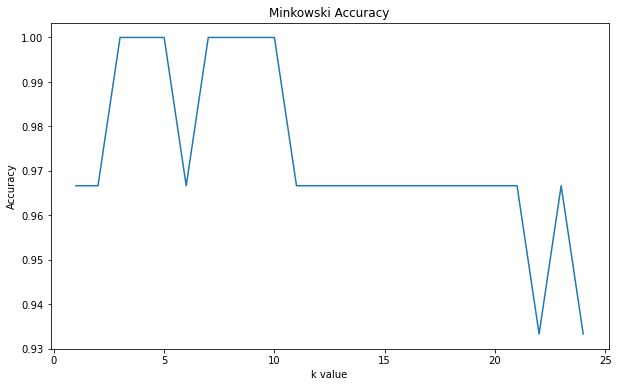

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,25),y=accuracies)
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Minkowski Accuracy')

Text(0.5, 1.0, 'Minkowski Accuracy Zoomed In')

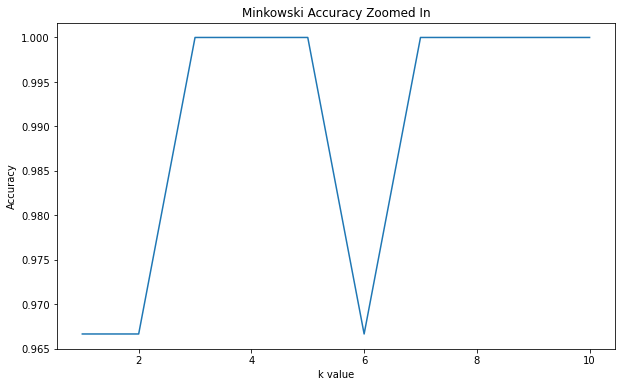

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,11),y=accuracies[0:10])
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.title('Minkowski Accuracy Zoomed In')

# Dari Graph diatas dapat dilihat bahwa k optimal adalah 2-5 dan 7-10

In [25]:
from sklearn.metrics import classification_report
knn = KNN_minko(k=10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# REGRESSION TASK

In [26]:
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

C:\Users\itosu\mambaforge\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
q1 = df_boston['target'].quantile(0.25)
q3 = df_boston['target'].quantile(0.75)
irq = q3 - q1
v_col = df_boston['target'][(df_boston['target'] <= q1 - 1.5 * irq) | (df_boston['target'] >= q3 + 1.5 * irq)]
perc = np.shape(v_col)[0] * 100.0 / np.shape(df_boston)[0]
print("Column Target outliers = %.2f%%" % (perc))
print(v_col)

Column Target outliers = 7.91%
97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: target, dtype: float64


<AxesSubplot:xlabel='target'>

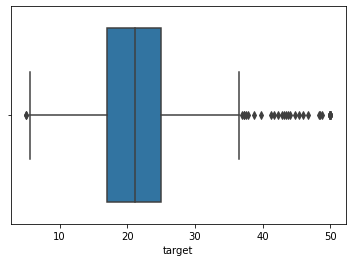

In [28]:
sns.boxplot(x=df_boston['target'])

# SEMUA OUTLIER TARGET(NILAI DIATAS 35) AKAN DI DELETE

In [29]:
df_boston = df_boston[~(df_boston['target'] >= 35)]
print(np.shape(df_boston))

(458, 14)


<AxesSubplot:>

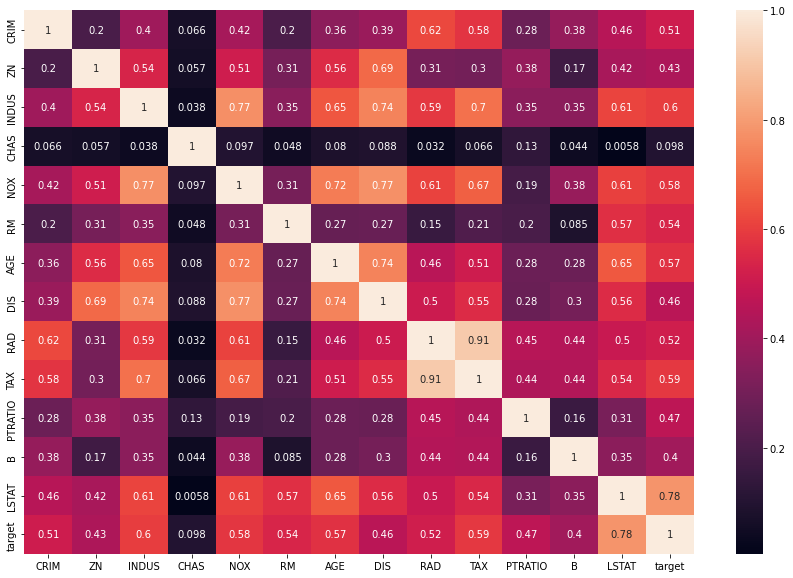

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df_boston.corr().abs(),annot=True)

# Semua kolom dengan korelasi dibawah 0.5 akan di-drop

In [31]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'RM', 'TAX',  'AGE']
X = df_boston.loc[:,column_sels].values

y = df_boston['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

from sklearn.metrics import mean_squared_error
accuracies = []

for i in range(1,25):
    knn = KNN(k=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X)
    accuracies.append(mean_squared_error(y,predictions))

Text(0.5, 0, 'k value')

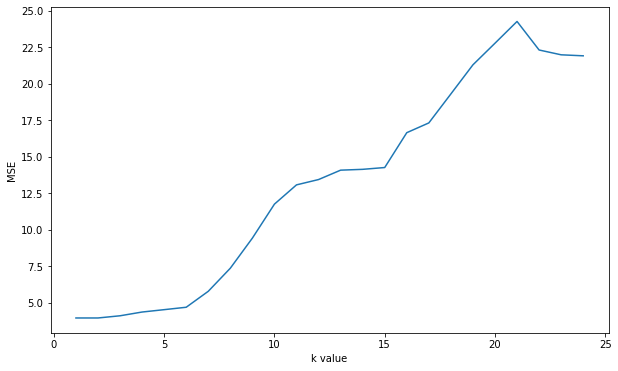

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,25),y=accuracies)
plt.ylabel("MSE")
plt.xlabel("k value")

Text(0.5, 0, 'k value')

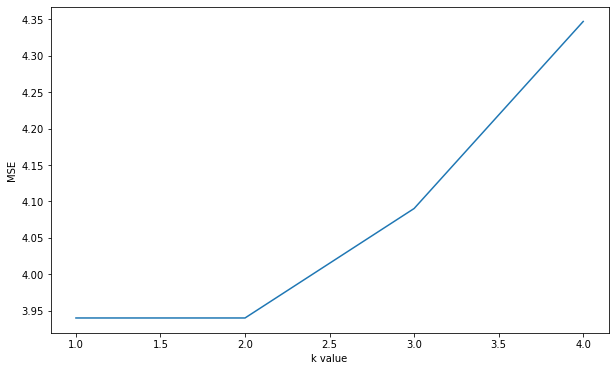

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(x=np.arange(1,5),y=accuracies[0:4])
plt.ylabel("MSE")
plt.xlabel("k value")

In [34]:
knn = KNN(k=2)
knn.fit(X_train,y_train)
predictions = knn.predict(X)
from sklearn.metrics import r2_score
print('R2 Score = ', r2_score(y,predictions))

R2 Score =  0.8967890884095135
